In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
# import glob
# import os
# import sys
# from collections import deque
# from copy import deepcopy

# import numpy as np
# import torch
# import torch.nn as nn
# import yaml
# import yamlordereddictloader

# from torchvision import models
# from yaml import dump


In [3]:
from scheduling import Scheduling
from generator import Generator, get_mem_props
from generator import *
from utils.visualizer import *
from ir.trace import trace
from main import perf, design_runner, s_mem_c_same_arch, show_memory_capacity_req, sweep_area


Unable to import mlperf_logging,  No module named 'mlperf_logging'
Unable to import onnx.  No module named 'onnx'


In [4]:
def get_expense(graph):
    expense = 0
    inputs = 0
    for n in graph.nodes:
        expense+=n.compute_expense
        if n.compute_expense>0:
            inputs += np.prod(n.inputs[0].shape)
    print(inputs)
    print(expense)

In [15]:
from common_models import alexnet_graph, vggnet_graph, resnet_50_graph, resnet_18_graph, bert_graph, gpt2_graph, dlrm_graph, alexnet_graph, langmodel_graph
# design_runner([vggnet_graph()])
# # for node in dlrm_graph.nodes:
# #     print(node.in_edge_mem + node.mem_fetch + node.out_edge_mem, node.compute_expense )

# # design_tech_runner([dlrm_graph])
# vgg11_graph = vggnet_graph()
# alexnet_data = alexnet_graph()
# langmod_graph1, langmod_graph2 = langmodel_graph()

# bert_graph_data = bert_graph()
# gpt2_graph_data = gpt2_graph()





In [16]:
from common_models import Unet, speech2text_model, objectdetection_model
resnet_18_graph = resnet_18_graph()
resnet_50_graph = resnet_50_graph()
speech2text_graph = speech2text_model()
bert_graph_data = bert_graph()
objectdetection_graph = objectdetection_model()

resnet18
inputs 150528 outputs 802816 weights 9408 total 962752
inputs 802816 outputs 802816 weights 0 total 1605632
inputs 200704 outputs 200704 weights 36864 total 438272
inputs 200704 outputs 200704 weights 0 total 401408
inputs 200704 outputs 200704 weights 36864 total 438272
inputs 200704 outputs 200704 weights 0 total 401408
inputs 200704 outputs 200704 weights 36864 total 438272
inputs 200704 outputs 200704 weights 0 total 401408
inputs 200704 outputs 200704 weights 36864 total 438272
inputs 200704 outputs 200704 weights 0 total 401408
inputs 200704 outputs 100352 weights 73728 total 374784
inputs 100352 outputs 100352 weights 0 total 200704
inputs 100352 outputs 100352 weights 147456 total 348160
inputs 100352 outputs 100352 weights 0 total 200704
inputs 200704 outputs 100352 weights 8192 total 309248
inputs 100352 outputs 100352 weights 0 total 200704
inputs 100352 outputs 100352 weights 147456 total 348160
inputs 100352 outputs 100352 weights 0 total 200704
inputs 100352 outp

%153: list[tensor] [157, 1, 1024]
inputs 37680 outputs 160768 weights 160768 total 359216
%290: list[tensor] [79, 1, 1024]
inputs 161792 outputs 80896 weights 80896 total 323584
inputs 16 outputs 16 weights 16 total 48
inputs 12288 outputs 12288 weights 0 total 24576
inputs 12288 outputs 12288 weights 602112 total 626688
inputs 12288 outputs 12288 weights 602112 total 626688
inputs 12288 outputs 12288 weights 602112 total 626688
inputs 12288 outputs 3072 weights 24576 total 39936
inputs 3072 outputs 12288 weights 15360 total 30720
inputs 12288 outputs 12288 weights 602112 total 626688
inputs 12288 outputs 12288 weights 0 total 24576
inputs 12288 outputs 49152 weights 2371584 total 2433024
inputs 49152 outputs 12288 weights 2408448 total 2469888
inputs 12288 outputs 12288 weights 0 total 24576
inputs 12288 outputs 12288 weights 602112 total 626688
inputs 12288 outputs 12288 weights 602112 total 626688
inputs 12288 outputs 12288 weights 602112 total 626688
inputs 12288 outputs 3072 weigh

In [7]:
dlrm_graph_data = dlrm_graph()


Using CPU...
Num batches  1
inputs 512 outputs 512 weights 7181 total 8205
inputs 256 outputs 256 weights 131840 total 132352
inputs 64 outputs 64 weights 16704 total 16832
inputs 1728 outputs 729 weights 3456 total 5913
inputs 512 outputs 512 weights 213407 total 214431
inputs 512 outputs 512 weights 263168 total 264192
inputs 256 outputs 256 weights 131840 total 132352
inputs 1 outputs 1 weights 513 total 515
dlrm.dlrm_s_pytorch.DLRM_Net (
	%input.1: float[1, 13],
	%lS_o: long[26, 1],
	%input.7: long[1],
	%input.8: long[7],
	%input.9: long[6],
	%input.10: long[1],
	%input.11: long[4],
	%input.12: long[2],
	%input.13: long[1],
	%input.14: long[4],
	%input.15: long[5],
	%input.16: long[3],
	%input.17: long[9],
	%input.18: long[2],
	%input.19: long[6],
	%input.20: long[7],
	%input.21: long[4],
	%input.22: long[6],
	%input.23: long[2],
	%input.24: long[7],
	%input.25: long[7],
	%input.26: long[3],
	%input.27: long[3],
	%input.28: long[7],
	%input.29: long[5],
	%input.30: long[5],
	%input

In [8]:
import ast
import astor
from ir.staticfg.staticfg import CFGBuilder
from synthesis.hls import parse_graph, get_stats
pagerank = CFGBuilder().build_from_file(
    "pagerank.py",
    "nonai_models/hpcg.py",
)
print(parse_graph(pagerank))
get_stats(pagerank)

['return 100 ', ' (x[1] ', ' x[0] ', '', ' 2) ', '', ' 2 ', ' (1 ', ' x[0]) ', '', ' 2\n'] return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

43.54000000000002
['return np.array([200 ', ' (x[1] ', ' x[0] ', '', ' 2) ', ' (', '2 ', ' x[0]) ', ' 2 ', ' (x[0] ', ' 1), \n    200 ', ' (x[1] ', ' x[0] ', '', ' 2)])\n'] return np.array([200 * (x[1] - x[0] ** 2) * (-2 * x[0]) + 2 * (x[0] - 1), 
    200 * (x[1] - x[0] ** 2)])

87.08000000000004
['return np.array([[1200 ', ' x[0] ', '', ' 2 ', ' 400 ', ' x[1] ', ' 2, ', '400 ', ' x[0]], [', '400 ', '\n    x[0], 200]])\n'] return np.array([[1200 * x[0] ** 2 - 400 * x[1] + 2, -400 * x[0]], [-400 *
    x[0], 200]])

130.62000000000006
['c1 ', ' 0.0001\n'] c1 = 0.0001

174.16000000000008
['return f(xk ', ' alpha ', ' pk) ', '', ' f(xk) ', ' c1 ', ' alpha ', ' np.dot(g(xk), pk)\n'] return f(xk + alpha * pk) <= f(xk) + c1 * alpha * np.dot(g(xk), pk)

217.7000000000001
['return wolfe(f, g, xk, alpha, pk) and abs(np.dot(g(xk ', ' alpha ', ' pk), pk

In [9]:
import ast
import astor
from ir.staticfg.staticfg import CFGBuilder
from synthesis.hls import parse_graph, get_stats
genomics = CFGBuilder().build_from_file(
    "genomics.py",
    "nonai_models/genomics.py",
)
print(parse_graph(genomics))
get_stats(genomics)

Yield from Subgraphs
None
-------------------------------
Generating DDDG
Creating Base Data Path
Cycle : 3265.499999999998
Hardware 
Avg Power : 0.0006999593275149292
{'Regs': 15, 'And': 0, 'Or': 0, 'Add': 0, 'Sub': 0, 'Mult': 0, 'FloorDiv': 0, 'Mod': 0, 'LShift': 0, 'RShift': 0, 'BitOr': 0, 'BitXor': 0, 'BitAnd': 0, 'Eq': 0, 'NotEq': 0, 'Lt': 0, 'LtE': 0, 'Gt': 0, 'GtE': 0, 'IsNot': 0, 'USub': 0, 'UAdd': 0, 'Not': 0, 'Invert': 0} {}


In [10]:
import ast
import astor
from ir.staticfg.staticfg import CFGBuilder
from synthesis.hls import parse_graph, get_stats
slam = CFGBuilder().build_from_file(
    "slam.py",
    "nonai_models/slam.py",
)
print(parse_graph(genomics))
get_stats(genomics)

Yield from Subgraphs
None
-------------------------------
Generating DDDG
Creating Base Data Path
Cycle : 3265.499999999998
Hardware 
Avg Power : 0.0006999593275149292
{'Regs': 15, 'And': 0, 'Or': 0, 'Add': 0, 'Sub': 0, 'Mult': 0, 'FloorDiv': 0, 'Mod': 0, 'LShift': 0, 'RShift': 0, 'BitOr': 0, 'BitXor': 0, 'BitAnd': 0, 'Eq': 0, 'NotEq': 0, 'Lt': 0, 'LtE': 0, 'Gt': 0, 'GtE': 0, 'IsNot': 0, 'USub': 0, 'UAdd': 0, 'Not': 0, 'Invert': 0} {}


In [11]:
# s_mem_c_same_arch([resnet_18_graph, resnet_50_graph, speech2text_graph, objectdetection_graph,  bert_graph_data], backprop=True, names = ["Resnet18","Resnet50", "DLRM","SSD", "BERT"], area_budget=2.5)

In [12]:
# show_memory_capacity_req([resnet_18_graph, resnet_50_graph, dlrm_graph_data, objectdetection_graph, speech2text_graph, bert_graph_data, pagerank], backprop=True, names = ["Resnet18","Resnet50","DLRM", "SSD",  "RNN", "BERT", "PageRank"], area_budget=2.5) 

11680424
8160448
87332368
241664
768109
[5.840212, 12, 4.080224, 4.3666184, 6.1, 12.0832, 11.2, 7.68109]
Resnet18 2
[1.0, 4.000000305594188, 11.111116110030252, 25.000032469422177, 97.60880975193932, 335.82307721907733, 908.3952870535942]
SLAM 0
[1.0, 6.25, 16.666666666666668, 55.55555555555556, 111.11111111111111, 250.0, 500.0]
SSD 2
[1.0, 3.8848162668057316, 10.101651110424905, 20.206956500077432, 50.54462958666402, 80.91517349079072, 100.17761877433567]
BERT 0
[1.0, 3.916688797967496, 10.367840306623222, 21.364624121228864, 55.299220990156925, 65.00664254366029, 68.86782447329011]
Genomics 0
[1.0, 11.11111111111111, 25.0, 50.0, 100.0, 142.85714285714286, 200.0]
RNN 0
[1.0, 4.000020826069732, 11.111104683348996, 25.001431866844413, 100.00572746737765, 400.127078723615, 3217.260941222658]
PageRank 0
[1.0, 7.6923076923076925, 25.0, 71.42857142857143, 142.85714285714286, 500.0, 1250.0]
DLRM 0
[1.0, 4.000000000000001, 11.122150088122437, 25.006569885401415, 100.68778676195346, 408.149606

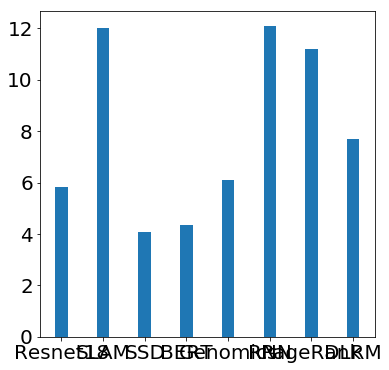

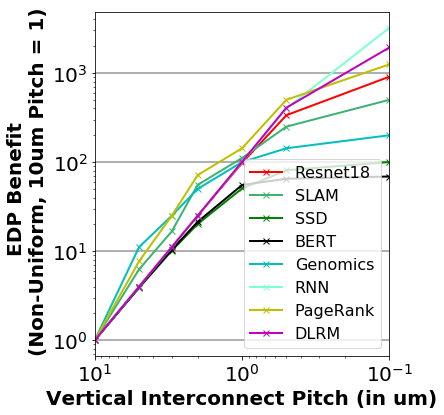

(None,)

In [32]:
sweep_area([resnet_18_graph, slam, objectdetection_graph, bert_graph_data, genomics, speech2text_graph, pagerank, dlrm_graph_data], backprop=True, names = ["Resnet18","SLAM", "SSD","BERT","Genomics", "RNN", "PageRank", "DLRM"], area_range=1),

In [14]:
# sweep_area([resnet_18_graph, resnet_50_graph, dlrm_graph_data, objectdetection_graph, speech2text_graph, bert_graph_data, pagerank, genomics], backprop=True, names = ["Resnet18","Resnet50","DLRM", "SSD",  "RNN", "BERT", "PageRank", "Genomics"], area_range=1),

25697984
768109
[12.848992, 7.68109]
Resnet50 2
[1.0, 3.979757127371018, 10.86063809300572, 23.629184685354716, 79.00015837122595, 190.74447956752266, 348.398518449364]
[29.170790462592684, 116.13579639686459, 316.5261760309695, 681.322472512564, 2117.3541204163917, 4475.174789556375, 6949.812634882041]
[291.70794656476255, 1161.3580589315773, 3165.2652873597417, 6813.227993467736, 21173.604334799114, 44752.45294362561, 69500.50691895146]
DLRM 0
[1.0, 4.0000052543618, 11.111151654120912, 24.999999999999993, 100.0032840796596, 400.0131363186384, 1817.2879548895273]
[10.000065679867607, 40.001313631863844, 111.11151654120914, 250.07391121076586, 1000.2956448430634, 4017.01738569997, 18392.40848266826]
[100.0032840796596, 400.0131363186385, 1112.2515348391191, 2500.7391121076585, 10069.109342907821, 40816.30105504604, 193262.55482184933]


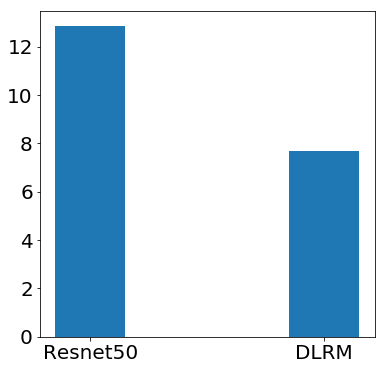

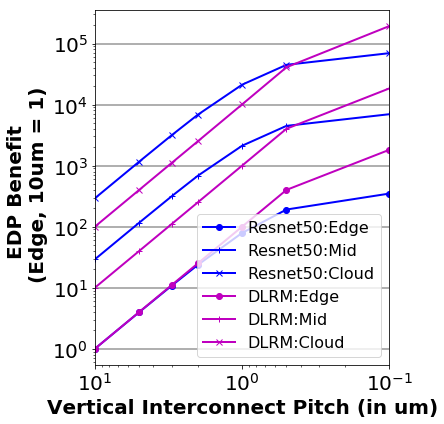

In [21]:
sweep_area([resnet_50_graph, dlrm_graph_data], backprop=True, names = ["Resnet50","DLRM"], area_range=3)

25697984
768109
241664
[12.848992, 7.68109, 12.0832]
Resnet50 2
[1.0, 3.6029674821356905, 8.063742057303973, 13.152482864477873, 21.166519042344103, 24.966274445737806, 26.487798625314284]
[0.4085182583776626, 1.60568514641966, 4.283562211149264, 8.885710775999838, 25.003768656411683, 45.7511284153258, 62.27567464677198]
[0.3066562890938773, 1.2204175521745058, 3.330482974792739, 7.246038089924754, 24.225895403948755, 58.492994269319404, 106.83859679348672]
DLRM 0
[1.0, 4.014774784483694, 11.198110420255793, 25.326210718746935, 110.00484991300787, 137.9676150920503, 137.9676150920503]
[0.3967037376095071, 1.5873015873015879, 4.413381886858798, 9.972627003724654, 40.834653602847524, 174.3423738701971, 328.4943216477388]
[0.29746266287335116, 1.189850651493405, 3.3084243820899775, 7.438520867440056, 29.950857169034833, 121.40926882764124, 574.8650628835429]
RNN 0
[1.0, 4.000145791596915, 11.114937068221543, 25.013674940130574, 87.1982881747061, 198.94606011594615, 278.8400326927118]
[0.3

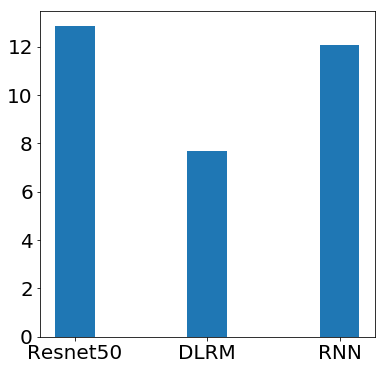

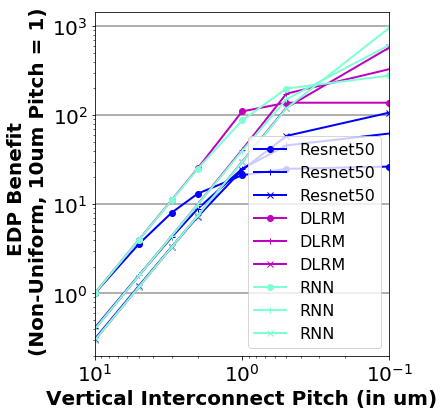

(None,)

In [22]:
sweep_area([resnet_50_graph, dlrm_graph_data, speech2text_graph], backprop=True, names = ["Resnet50","DLRM", "RNN"], area_range=1),

25697984
87332368
8160448
[12.848992, 873.32368, 408.0224]
Resnet50 0
[1.0, 2.738525146779962, 4.352982457894336, 5.3358364668976375, 6.17124045046623, 6.422629418203251, 6.507456856997635]
Resnet50 1
[1.0, 3.869877674690345, 9.980100575586265, 19.700623106592968, 47.40219805383733, 73.0958864874888, 88.41923455359891]
Resnet50 2
[1.0, 3.979757127371018, 10.86063809300572, 23.629184685354716, 79.00015837122595, 190.74447956752266, 348.398518449364]
DLRM 0
[1.0, 4.000004571249959, 11.111140739628208, 25.000542847099133, 90.25669802101261, 117.94929496690911, 130.7595673244051]
DLRM 1
[1.0, 4.000004571249957, 11.111140739628198, 25.00054284709914, 100.00788601900894, 400.03154407603546, 1963.5489413020357]
DLRM 2
[1.0, 4.000004571249958, 11.111140739628198, 25.000542847099126, 100.00788601900888, 400.03154407603574, 6556.922728951798]
RNN 0
[1.0, 1.846237421378691, 2.2529668733670998, 2.419538249514386, 2.531852464693212, 2.5615794985913314, 2.5712404292657425]
RNN 1
[1.0, 3.588285558224

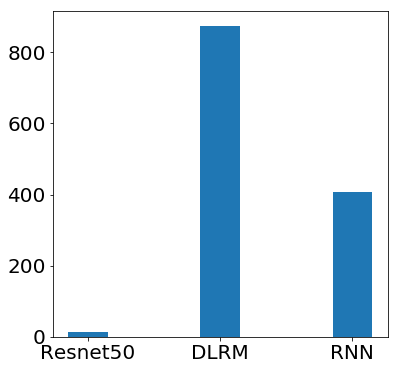

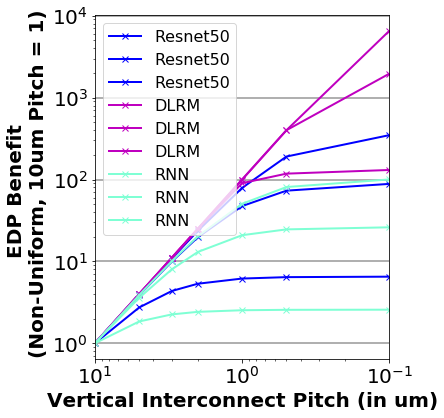

(None,)

In [17]:
sweep_area([resnet_50_graph, bert_graph_data, objectdetection_graph], backprop=True, names = ["Resnet50","DLRM", "RNN"], area_range=1),

In [ ]:
# sweep_area([], backprop=True, names = ["PageRank"], area_budget=2.5)

In [18]:
from scheduling import illusion_mapping
chips = [6,6,8,12,20,32,55,96,171,308,559]
deeper = [2**x for x in range(11)]
capacity=[2,4,6,8,10,12,14,16,18,20,22]

for i in range(11):
    illusion_mapping(resnet_18_graph, chips[i], deeper[i], 10**6*capacity[i], deeper= True, wider=False)

# # print("Wider")
# # wider = [2**x for x in range(11)]
# # chips = [6,3,3,4,6,10,16,27,47,84,150]
# # cap = [2,10,18,26,34,42,50,58,66,74,82]
# # for i in range(1):
# #     illusion_mapping([resnet_18_graph, resnet_50_graph, objectdetection_graph, bert_graph_data, dlrm_graph_data], chips[i], wider[i], 10**6*cap[i], deeper= False, wider=True)

242991.0
346430.0
550760.0
812028.0
1482250.0
2404528.0
4405394.0
7993615.0
14184814.0
26102888.0
47428227.0


In [31]:
print(bert_graph_data)
for graph in [resnet_50_graph, objectdetection_graph, bert_graph_data, dlrm_graph_data]:
    for chip in range(3,50):
        try:
            print(chip)
            cap = chip//graph.memory_size()
            illusion_mapping(graph, chip ,1, 10**6*cap, deeper= True, wider=False)
        except:
            continue


In [31]:
print(bert_graph_data)

for graph in [resnet_50_graph, objectdetection_graph, bert_graph_data, dlrm_graph_data]:
    for chip in range(3,50):
        try:
            print(chip)
            cap = chip//graph.memory_size()
            illusion_mapping(graph, chip ,1, 10**6*cap, deeper= True, wider=False)
        except:
            continue


In [88]:
# 
# get_expense(dlrm_graph_data)

In [12]:
# import torchvision.models as models
# import torch

# for name, model in models.__dict__.items():
# #             print(name)
#         if not name.islower() or name.startswith("__") or not callable(model):
#         #             print(name.islower())
#             continue
# #         print(name)
#         if "alexnet" in name:
#             model = model().eval()
#             inputs = torch.randn(1, 3, 224, 224)
#             alexnet_graph = trace(model, inputs)
#             break
#     return resnet_graph

In [13]:
# from gnn_model import gnn_graph
# from gan_model import gan_graph
# from dart_model import dart_graph
# from a3c_model import a3c_graph
# design_tech_runner([gnn_graph])
# design_tech_runner([dart_graph()])
# design_tech_runner([a3c_graph()]) # Actor Critic

# gan_graph in inference netG
# design_tech_runner([gan_graph()])

# # gan_graph in training netD(training)*2 + netG(inference) + (netG+netD)-> training 
# graph1, graph2 = gan_graph(True)
# design_tech_runner([]) 

In [14]:
# vgg11_graph = vggnet_graph()
# dlrm_graph_data = dlrm_graph()
# bert_graph_data = bert_graph()
# gpt2_graph_data = gpt2_graph()
# resnet_graph_data = resnet_graph()
# Does memory read energy doubles up on increasing the array size?
# backprop = False

# graph = dlrm_graph_data
# in_time, in_energy, area = perf(graph, backprop, False, "tpu.yaml")
# arch_time, arch_energy, arch_area = design_runner([graph], backprop, print_stats= False)
# scale_energy = np.sum(arch_energy[1:5])*area/arch_area+np.sum(arch_energy[5:])
# print(in_time[0]/arch_time[0]*area/arch_area, (in_energy[0])/scale_energy )
# print(in_time[0]/arch_time[0], (in_energy[0])/arch_energy[0], area/arch_area )

In [15]:
# # dlrm_graph_data = dlrm_graph()
# # resnet_graph_data = resnet_graph()
# # Does memory read energy doubles up on increasing the array size?

# backprop = False
# name = ["vgg_graph", "resnet_graph","bert_graph","gpt2_graph", "dlrm_graph"]
# graph_list = [vgg11_graph, resnet_graph_data, bert_graph_data, gpt2_graph_data, dlrm_graph_data]
# # graph_list = []
# # name = ["dlrm_graph"]

# for i,graph in enumerate(graph_list):
# # for graph in [bert_graph_data]:
#     log_file_name = "logs/"+str(name[i])+str(backprop)
#     arch_time, arch_energy, arch_area = design_runner([graph], backprop, print_stats= False, stats_file = log_file_name)


In [13]:
backprop = False
import time
start = time.time()
# name = ["vgg_graph", "resnet_graph","bert_graph","gpt2_graph", "dlrm_graph"]
# graph_list = [vgg11_graph, resnet_graph_data, bert_graph_data, gpt2_graph_data, dlrm_graph_data]
# graph_list = [vgg11_graph]
# name = ["vgg_graph"]

# for i,graph in enumerate(graph_list):
# # for graph in [bert_graph_data]:
#     log_file_name = "logs/"+str(name[i])+str(backprop)
#     arch_time, arch_energy, arch_area = design_runner([graph], backprop, print_stats= False, stats_file = log_file_name)
# end = time.time()
# print(start-end)

In [13]:
# backprop = False
# log_file_name = "logs/resnet"+str(backprop)
# design_runner([resnet_graph_data], backprop, print_stats= True, stats_file = log_file_name)

In [ ]:
# for j in range(0,5):
#     for i in range(5,15):
#         scheduler = Scheduling()
#         scheduler.config["memory"]["level1"]["frequency"]=5
#         scheduler.config["memory"]["level1"]["frequency"]*=2**j
#         memory = scheduler.config["memory"]["level1"]
#         scheduler.mem_read_bw[1] = memory["frequency"]*memory["banks"]*memory["read_ports"]*memory["width"]
#         scheduler.config["memory"]["level0"]["size"]=10**(i/2)
#         scheduler.mem_size[0] = 10**(i/2)
#         print(scheduler.mem_read_bw[1], scheduler.mem_size[0])
#         print("Config i : ",i , ", j :", j)
#         design_runner([dlrm_graph], scheduler)


# Technology Tables

In [ ]:
import numpy as np
import pandas as pd
d = pd.read_csv('tables/sram.csv')
a = np.array(d)

# input = a[:,:3]
# output = a[:,3:]


In [ ]:
# # d = pd.read_csv('plugins/cacti/bus_width.out')
# d = pd.read_csv('plugins/cacti/cache.cfg.out')

# d = d.drop(d.columns[[12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]], axis=1)

# d = d.drop(' Associativity',1)
# d = d.drop(' Dynamic search energy (nJ)',1)
# d


In [ ]:
a= np.array(d)
np.savetxt('logic.csv',a, fmt='%.18e', delimiter=',')



In [ ]:
# bar_graph("read_dummy.png", read_bw_req, read_bw_actual, read_bw_limit, graph.nodes)


In [ ]:
mem_table = np.array(pd.read_csv("tables/sram.csv", header=None))
a = mem_table[np.where(mem_table[:, 1] == 4)]
a = a[np.where(a[:, 2] == 32)]

In [1]:
# from dot import *

In [ ]:
# dot_rep = make_graph_from_trace()

In [ ]:
import torch
import torch.nn as nn
inputs = torch.randn(1,1,4,4)
model = nn.Conv2d(1, 4, 3, 1, 1, bias=False)
input_graph=trace(model, inputs)
# design_tech_runner([input_graph], backprop=False,print_stats=True)

## MLPerf 

In [ ]:
from common_models import alexnet_graph, vggnet_graph, resnet_graph, bert_graph, gpt2_graph, dlrm_graph, alexnet_graph, langmodel_graph
# design_runner([vggnet_graph()])
# # for node in dlrm_graph.nodes:
# #     print(node.in_edge_mem + node.mem_fetch + node.out_edge_mem, node.compute_expense )

# design_tech_runner([dlrm_graph])
vgg11_graph = vggnet_graph()
resnet_graph_data = resnet_graph()
alexnet_data = alexnet_graph()
langmod_graph1, langmod_graph2 = langmodel_graph()
# dlrm_graph_data = dlrm_graph()
bert_graph_data = bert_graph()
gpt2_graph_data = gpt2_graph()


In [13]:
get_expense(resnet_graph_data)

2208744
1814073856


In [6]:
# get_expense()

## Analyze N3XT



In [12]:
perf(alexnet_data, backprop=False, print_stats=True, filename = 'illusion_nvm.yaml', mapping="nn_dataflow")

Time 203605 14930 14309
Energy 1245967810 169623898 657069416 12513260 10720629 1610601 6357889 53323 1610601583
Area 285631 50462 24499 210669
memory accesses 120287432 120287432 61117096 512592
rf access 357102944.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]


([203605.837890625, 14930, 14309, 0],
 [1245967810, 169623898, 12513260, 10720629, 1610601, 391149414, 3280588, 0],
 285631.669568)

In [13]:
perf(vgg11_graph, backprop=False, print_stats=True, filename = 'illusion_nvm.yaml', mapping="nn_dataflow")

Time 3525114 34067 1633346
Energy 9830682202 1807171654 7000412303 29351888 25146979 27885033 13824682 1466040 27885033780
Area 285631 50462 24499 210669
memory accesses 282153736 282153736 132893864 14092752
rf access 3804571904.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]


([3525114.916015625, 34067, 1633346, 0],
 [9830682202,
  1807171654,
  29351888,
  25146979,
  27885033,
  850520729,
  90193612,
  0],
 285631.669568)

In [15]:
perf(dlrm_graph_data, backprop=False, print_stats=True, filename = 'illusion_nvm.yaml', mapping="nn_dataflow")

Time 392 195 0
Energy 6008484 191596 742182 80020 68557 3101 79725 295 3101330
Area 285631 50462 24499 210669
memory accesses 769223 769223 766381 2842
rf access 403360.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
392.057861328125 0 195.104736328125


([392.057861328125, 195, 0, 0],
 [6008484, 191596, 80020, 68557, 3101, 4904838, 18188, 0],
 285631.669568)

In [18]:
perf(resnet_graph_data, backprop=False, print_stats=True, filename = 'illusion_nvm.yaml', mapping="nn_dataflow")

Time 530470 2891 84690
Energy 2199260885 430842540 1668947947 2225581 1906748 4196230 1215091 266362 4196230840
Area 285631 50462 24499 210669
memory accesses 21394064 21394064 11680424 2560488
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
530470.791015625 84690.0 2891.666015625


([530470.791015625, 2891, 84690, 0],
 [2199260885, 430842540, 2225581, 1906748, 4196230, 74754713, 16387123, 0],
 285631.669568)

In [23]:
design_runner([resnet_graph_data], backprop=False, print_stats=True, file = 'illusion_nvm.yaml')

Time 527597 18 84690
Energy 2182502302 430842540 1668947947 1774889 1520621 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 17061648 17061648 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
======Optimizing Design=========
Time 527597 18 84690
Energy 2182502302 430842540 1668947947 1774889 1520621 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 17061648 17061648 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 527597 18 84690
Energy 2182499512 430842540 1668947947 1773386 1519333 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 17047203 17047203 11680424 76264
rf access 907036928.0

Time 527597 18 84690
Energy 2182426970 430842540 1668947947 1734316 1485860 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 16671633 16671633 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2130005 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 527597 18 84690
Energy 2182424179 430842540 1668947947 1732813 1484573 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 16657188 16657188 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2134820 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 527597 18 84690
Energy 2182421389 430842540 1668947947 1731311 1483286 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 16642743 16642743 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  40

Time 527597 18 84690
Energy 2182343267 430842540 1668947947 1689236 1447238 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 16238283 16238283 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2274455 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 527597 18 84690
Energy 2182340477 430842540 1668947947 1687733 1445951 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 16223838 16223838 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2279270 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 527597 18 84690
Energy 2182337686 430842540 1668947947 1686230 1444663 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 16209393 16209393 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  40

Time 527597 18 84690
Energy 2182267934 430842540 1668947947 1648663 1412478 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 15848268 15848268 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2404460 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 527597 18 84690
Energy 2182265144 430842540 1668947947 1647160 1411191 4173500 1215091 7933 4173500952
Area 285631 50462 24499 210669
memory accesses 15833823 15833823 11680424 76264
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2409275 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 442889 0 0
Energy 2180791168 430842540 1668947947 1473624 1262514 3503427 1215091 104 3503427636
Area 285631 50462 24499 210669
memory accesses 14165648 14165648 11680424 1000
rf access 907036928.0
Design Params 
 No. of PEs :  4096 
 Me

([442889.369140625, 0, 0, 0],
 [2180791168, 430842540, 1473624, 1262514, 3503427, 74754713, 6400, 0],
 285631.669568)

In [28]:
design_runner([objectdetection_graph], backprop=False, print_stats=True, file = 'illusion.yaml')

Time 123243690 12374970 61621827
Energy 275906991073 47907377510 185578051829 48336595 41411964 974905652 848915 17077236 974905652939
Area 285631 50462 24499 210669
memory accesses 464649856 464649856 8160448 164160000
rf access 100857636864.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  4 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
======Optimizing Design=========
Time 123243690 12374970 61621827
Energy 275906991073 47907377510 185578051829 48336595 41411964 974905652 848915 17077236 974905652939
Area 285631 50462 24499 210669
memory accesses 464649856 464649856 8160448 164160000
rf access 100857636864.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  4 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 118293701 9899970 59146827
Energy 275867886882 47907388211 185578093281 48336595 41411964 935749309 848915 17077236 935749309453
Area 2856

Time 118293717 9899971 59146843
Energy 275867882267 47907387238 185578089512 48336595 41411964 935749436 848915 17077236 935749436019
Area 285631 50462 24499 210669
memory accesses 464649856 464649856 8160448 164160000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  2359976 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 118293717 9899971 59146843
Energy 275867882267 47907387238 185578089512 48336595 41411964 935749436 848915 17077236 935749436019
Area 285631 50462 24499 210669
memory accesses 464649856 464649856 8160448 164160000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  2374975 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 118293717 9899971 59146843
Energy 275867882267 47907387238 185578089512 48336595 41411964 935749436 848915 17077236 935749436019
Area 285631 50462 24499 210669
memory access

Time 118293715 9899971 59146841
Energy 275867882251 47907387238 185578089512 48336595 41411964 935749420 848915 17077236 935749420198
Area 285631 50462 24499 210669
memory accesses 464649856 464649856 8160448 164160000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  2749950 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 118293715 9899971 59146841
Energy 275867882251 47907387238 185578089512 48336595 41411964 935749420 848915 17077236 935749420198
Area 285631 50462 24499 210669
memory accesses 464649856 464649856 8160448 164160000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  2764949 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 118293715 9899971 59146841
Energy 275867882251 47907387238 185578089512 48336595 41411964 935749420 848915 17077236 935749420198
Area 285631 50462 24499 210669
memory access

Time 118293720 9899971 59146846
Energy 275867882291 47907387238 185578089512 48336595 41411964 935749459 848915 17077236 935749459750
Area 285631 50462 24499 210669
memory accesses 464649856 464649856 8160448 164160000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  3124925 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 118293720 9899971 59146846
Energy 275867882291 47907387238 185578089512 48336595 41411964 935749459 848915 17077236 935749459750
Area 285631 50462 24499 210669
memory accesses 464649856 464649856 8160448 164160000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  3139924 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 118293720 9899971 59146846
Energy 276836224611 47907387238 185578089512 64631865 57707188 1871501285 1135101 22834327 1871501285376
Area 495046 50462 24499 420084
memory acc

Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  3499900 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  3514899 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 5

Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  3874875 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  3889874 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 5

Time 118293720 9899971 59146846
Energy 276836224611 47907387238 185578089512 64631865 57707188 1871501285 1135101 22834327 1871501285376
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  4264849 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293720 9899971 59146846
Energy 276836224611 47907387238 185578089512 64631865 57707188 1871501285 1135101 22834327 1871501285376
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  4279848 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293720 9899971 59146846
Energy 276836224611 47907387238 185578089512 64631865 57707188 1871501285 1135101 22834327 1871501285376
Area 495046 5

Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  4639824 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  4654823 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 5

Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  5029798 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  5044797 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 5

Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  5299780 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  5314779 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293718 9899971 59146843
Energy 276836229320 47907388211 185578093281 64631865 57707188 1871501253 1135101 22834327 1871501253734
Area 495046 5

Time 118293721 9899971 59146846
Energy 276836229368 47907388211 185578093281 64631865 57707188 1871501301 1135101 22834327 1871501301196
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  5569762 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293721 9899971 59146846
Energy 276836229368 47907388211 185578093281 64631865 57707188 1871501301 1135101 22834327 1871501301196
Area 495046 50462 24499 420084
memory accesses 464649856 464649856 8160448 164160000
rf access 100857659392.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  5584761 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 118293721 9899971 59146846
Energy 276836229368 47907388211 185578093281 64631865 57707188 1871501301 1135101 22834327 1871501301196
Area 495046 5

Time 117119286 9719264 58153131
Energy 276126787200 47907375564 185578044293 64843169 57895853 1852920799 1135101 22433725 1852920799948
Area 495046 50462 24499 420084
memory accesses 466168954 466168954 8160448 161280000
rf access 100857632768.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  5929634 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 117121140 9719476 58154769
Energy 276126762116 47907379456 185578059366 64804402 57861240 1852950131 1135101 22433725 1852950131712
Area 495046 50462 24499 420084
memory accesses 465890254 465890254 8160448 161280000
rf access 100857640960.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  5944529 
 Memory Level-0 Read Energy :  0.13909800000000003
Tech Params [1, 1, 40]
Time 117122207 9719665 58155642
Energy 276126732106 47907384320 185578078208 64767106 57827939 1852967012 1135101 22433725 1852967012505
Area 495046 5

Time 117123561 9719946 58156731
Energy 278030343274 47907368755 185578017914 90071529 83200686 3705976867 1594282 31508789 3705976867737
Area 912993 50462 24499 838031
memory accesses 461037584 461037584 8160448 161280000
rf access 100857618432.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  6302032 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123639 9719958 58156797
Energy 278030284159 47907368755 185578017914 90039517 83171116 3705979335 1594282 31508789 3705979335782
Area 912993 50462 24499 838031
memory accesses 460873728 460873728 8160448 161280000
rf access 100857618432.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  6316928 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123542 9719928 58156712
Energy 278030304848 47907386265 185578085744 90007505 83141546 3705976266 1594282 31508789 3705976266547
Area 912993 50462 24499 838031
memo

Time 117123708 9719972 58156847
Energy 278029564448 47907373619 185578036756 89651934 82813098 3705981519 1594282 31508789 3705981519052
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857628672.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  6674432 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123708 9719972 58156847
Energy 278029564448 47907373619 185578036756 89651934 82813098 3705981519 1594282 31508789 3705981519052
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857628672.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  6689328 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123691 9719972 58156830
Energy 278029563910 47907373619 185578036756 89651934 82813098 3705980981 1594282 31508789 3705980981145
Area 912993 50462 24499 838031
memo

Time 117123653 9719972 58156789
Energy 278029576931 47907376537 185578048061 89651934 82813098 3705979778 1594282 31508789 3705979778764
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  7061728 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123653 9719972 58156789
Energy 278029576931 47907376537 185578048061 89651934 82813098 3705979778 1594282 31508789 3705979778764
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  7076624 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123653 9719972 58156789
Energy 278029576931 47907376537 185578048061 89651934 82813098 3705979778 1594282 31508789 3705979778764
Area 912993 50462 24499 838031
memo

memory accesses 458889856 458889856 8160448 161280000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  7389440 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123708 9719972 58156844
Energy 278029578671 47907376537 185578048061 89651934 82813098 3705981519 1594282 31508789 3705981519052
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  7404336 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123708 9719972 58156844
Energy 278029578671 47907376537 185578048061 89651934 82813098 3705981519 1594282 31508789 3705981519052
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :

Time 117123708 9719972 58156833
Energy 278029630823 47907387238 185578089512 89651934 82813098 3705981519 1594282 31508789 3705981519052
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  7732048 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123708 9719972 58156833
Energy 278029630823 47907387238 185578089512 89651934 82813098 3705981519 1594282 31508789 3705981519052
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  7746944 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123708 9719972 58156833
Energy 278029630823 47907387238 185578089512 89651934 82813098 3705981519 1594282 31508789 3705981519052
Area 912993 50462 24499 838031
memo

Time 117123719 9719972 58156844
Energy 278029631171 47907387238 185578089512 89651934 82813098 3705981867 1594282 31508789 3705981867110
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  8119344 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123719 9719972 58156844
Energy 278029631171 47907387238 185578089512 89651934 82813098 3705981867 1594282 31508789 3705981867110
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  8134240 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123719 9719972 58156844
Energy 278029631171 47907387238 185578089512 89651934 82813098 3705981867 1594282 31508789 3705981867110
Area 912993 50462 24499 838031
memo

Time 117123719 9719972 58156844
Energy 278029631171 47907387238 185578089512 89651934 82813098 3705981867 1594282 31508789 3705981867110
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  8447056 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123719 9719972 58156844
Energy 278029631171 47907387238 185578089512 89651934 82813098 3705981867 1594282 31508789 3705981867110
Area 912993 50462 24499 838031
memory accesses 458889856 458889856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  8461952 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117123719 9719972 58156844
Energy 278029631171 47907387238 185578089512 89651934 82813098 3705981867 1594282 31508789 3705981867110
Area 912993 50462 24499 838031
memo

Time 117527034 9719755 58560376
Energy 278043703471 47907387238 185578089512 90333306 83442494 3718743399 1594282 31508789 3718743399014
Area 912993 50462 24499 838031
memory accesses 462377509 462377509 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  8789913 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117526650 9719794 58559973
Energy 278043489758 47907367782 185578014146 90277820 83391240 3718731248 1594282 31508789 3718731248640
Area 912993 50462 24499 838031
memory accesses 462093497 462093497 8160448 161280000
rf access 100857616384.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  8804861 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117526874 9719756 58560217
Energy 278043475446 47907385292 185578081976 90222333 83339986 3718738336 1594282 31508789 3718738336358
Area 912993 50462 24499 838031
memo

Time 117528570 9719938 58561729
Energy 278041875642 47907387238 185578089512 89357887 82541482 3718792000 1594282 31508789 3718792000512
Area 912993 50462 24499 838031
memory accesses 457384757 457384757 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  9178561 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528455 9719937 58561615
Energy 278041810206 47907387238 185578089512 89325764 82511809 3718788361 1594282 31508789 3718788361728
Area 912993 50462 24499 838031
memory accesses 457220329 457220329 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  9193509 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528671 9719957 58561829
Energy 278041669903 47907369728 185578021683 89293640 82482136 3718795196 1594282 31508789 3718795196313
Area 912993 50462 24499 838031
memo

Time 117528683 9719972 58561822
Energy 278041296111 47907373619 185578036756 89089277 82293362 3718795576 1594282 31508789 3718795576012
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857628672.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  9552261 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528662 9719972 58561808
Energy 278041262259 47907366809 185578010378 89089277 82293362 3718794911 1594282 31508789 3718794911539
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857614336.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  9567209 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528580 9719961 58561726
Energy 278041311817 47907377510 185578051829 89089277 82293362 3718792316 1594282 31508789 3718792316928
Area 912993 50462 24499 838031
memo

Time 117528711 9719972 58561847
Energy 278041311221 47907376537 185578048061 89089277 82293362 3718796461 1594282 31508789 3718796461977
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  9925961 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528711 9719972 58561847
Energy 278041311221 47907376537 185578048061 89089277 82293362 3718796461 1594282 31508789 3718796461977
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  9940909 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528704 9719972 58561841
Energy 278041306258 47907375564 185578044293 89089277 82293362 3718796240 1594282 31508789 3718796240486
Area 912993 50462 24499 838031
memo

Time 117528722 9719972 58561847
Energy 278041363721 47907387238 185578089512 89089277 82293362 3718796810 1594282 31508789 3718796810035
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  10329557 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528722 9719972 58561847
Energy 278041363721 47907387238 185578089512 89089277 82293362 3718796810 1594282 31508789 3718796810035
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  10344505 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528722 9719972 58561847
Energy 278041363721 47907387238 185578089512 89089277 82293362 3718796810 1594282 31508789 3718796810035
Area 912993 50462 24499 838031
me

Time 117528711 9719972 58561836
Energy 278041363373 47907387238 185578089512 89089277 82293362 3718796461 1594282 31508789 3718796461977
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  10688309 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528711 9719972 58561836
Energy 278041363373 47907387238 185578089512 89089277 82293362 3718796461 1594282 31508789 3718796461977
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  10703257 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528711 9719972 58561836
Energy 278041363373 47907387238 185578089512 89089277 82293362 3718796461 1594282 31508789 3718796461977
Area 912993 50462 24499 838031
me

Time 117528722 9719972 58561847
Energy 278041363721 47907387238 185578089512 89089277 82293362 3718796810 1594282 31508789 3718796810035
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  11047061 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528722 9719972 58561847
Energy 278041363721 47907387238 185578089512 89089277 82293362 3718796810 1594282 31508789 3718796810035
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  11062009 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528722 9719972 58561847
Energy 278041363721 47907387238 185578089512 89089277 82293362 3718796810 1594282 31508789 3718796810035
Area 912993 50462 24499 838031
me

Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  11405813 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528722 9719972 58561847
Energy 278041363721 47907387238 185578089512 89089277 82293362 3718796810 1594282 31508789 3718796810035
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  11420761 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 117528722 9719972 58561847
Energy 278041363721 47907387238 185578089512 89089277 82293362 3718796810 1594282 31508789 3718796810035
Area 912993 50462 24499 838031
memory accesses 456009856 456009856 8160448 161280000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connecti

Time 116763436 9539884 57976658
Energy 277326372243 47907378483 185578055598 89331550 82517154 3694581936 1594282 30946132 3694581936537
Area 912993 50462 24499 838031
memory accesses 457249948 457249948 8160448 158400000
rf access 100857638912.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  11778771 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 116762919 9539902 57976134
Energy 277326236555 47907367782 185578014146 89296630 82484898 3694565577 1594282 30946132 3694565577830
Area 912993 50462 24499 838031
memory accesses 457071208 457071208 8160448 158400000
rf access 100857616384.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  11793666 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 116763111 9539906 57976309
Energy 277326237089 47907380428 185578063134 89261710 82452642 3694571653 1594282 30946132 3694571653017
Area 912993 50462 24499 838031
me

Time 116763456 9539945 57976619
Energy 277324858083 47907376537 185578048061 88549050 81794344 3694582569 1594282 30946132 3694582569369
Area 912993 50462 24499 838031
memory accesses 453244663 453244663 8160448 158400000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  12136251 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 116763492 9539945 57976655
Energy 277324816074 47907376537 185578048061 88526620 81773626 3694583708 1594282 30946132 3694583708467
Area 912993 50462 24499 838031
memory accesses 453129856 453129856 8160448 158400000
rf access 100857634816.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  12151146 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 116763614 9539951 57976771
Energy 277324819934 47907376537 185578048061 88526620 81773626 3694587568 1594282 30946132 3694587568742
Area 912993 50462 24499 838031
me

Time 116763494 9539956 57976662
Energy 277324740279 47907360972 185577987768 88526620 81773626 3694583771 1594282 30946132 3694583771750
Area 912993 50462 24499 838031
memory accesses 453129856 453129856 8160448 158400000
rf access 100857602048.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  12508626 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 116763549 9539961 57976712
Energy 277324742020 47907360972 185577987768 88526620 81773626 3694585512 1594282 30946132 3694585512038
Area 912993 50462 24499 838031
memory accesses 453129856 453129856 8160448 158400000
rf access 100857602048.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  12523521 
 Memory Level-0 Read Energy :  0.195367
Tech Params [1, 1, 40]
Time 116763549 9539961 57976712
Energy 277324742020 47907360972 185577987768 88526620 81773626 3694585512 1594282 30946132 3694585512038
Area 912993 50462 24499 838031
me

Time 116763693 9539972 57976836
Energy 281084701299 47907369728 185578021683 121303315 114435679 7389063373 2184560 42403838 7389063373164
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857620480.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  12866106 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763693 9539972 57976836
Energy 281084701299 47907369728 185578021683 121303315 114435679 7389063373 2184560 42403838 7389063373164
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857620480.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  12881001 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763693 9539972 57976836
Energy 281084701299 47907369728 185578021683 121303315 114435679 7389063373 2184560 42403838 7389063373164
Area 1742802 50462 2449

 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  13238481 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763712 9539972 57976837
Energy 281084787841 47907387238 185578089512 121303315 114435679 7389064575 2184560 42403838 7389064575526
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  13253376 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763712 9539972 57976837
Energy 281084787841 47907387238 185578089512 121303315 114435679 7389064575 2184560 42403838 7389064575526
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  13268271 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763712 9539972 5797683

 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  13610856 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763722 9539972 57976847
Energy 281084788474 47907387238 185578089512 121303315 114435679 7389065208 2184560 42403838 7389065208348
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  13625751 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763722 9539972 57976847
Energy 281084788474 47907387238 185578089512 121303315 114435679 7389065208 2184560 42403838 7389065208348
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  13640646 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763722 9539972 5797684

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  13983231 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  13998126 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  14340711 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  14355606 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  14713086 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  14727981 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  14996091 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  15010986 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  15293991 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  15308886 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  15651471 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  15666366 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  15934476 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  15949371 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  16232376 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  16247271 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  16604751 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  16619646 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 2449

Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  16977126 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  16992021 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129

 Memory Level-0 Size :  17349501 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  17364396 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 185578089512 121303315 114435679 7389065145 2184560 42403838 7389065145066
Area 1742802 50462 24499 1667840
memory accesses 453129856 453129856 8160448 158400000
rf access 100857657344.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  17379291 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 116763721 9539972 57976846
Energy 281084788411 47907387238 1

Time 115593357 9359926 56986547
Energy 280318462993 47907368755 185578017914 120803091 113963775 7315001936 2184560 41632859 7315001936345
Area 1742802 50462 24499 1667840
memory accesses 451261264 451261264 8160448 155520000
rf access 100857618432.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  17705284 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593588 9359936 56986763
Energy 280318408990 47907373619 185578036756 120755583 113918957 7315016554 2184560 41632859 7315016554533
Area 1742802 50462 24499 1667840
memory accesses 451083796 451083796 8160448 155520000
rf access 100857628672.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  17720073 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593588 9359939 56986761
Energy 280318311922 47907372646 185578032988 120708074 113874138 7315016554 2184560 41632859 7315016554533
Area 1742802 50462 2449

Time 115593691 9359962 56986836
Energy 280316502310 47907377510 185578051829 119761357 112981020 7315023072 2184560 41632859 7315023072600
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857636864.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  18075009 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593683 9359960 56986828
Energy 280316511286 47907379456 185578059366 119761357 112981020 7315022566 2184560 41632859 7315022566342
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857640960.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  18089798 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593590 9359948 56986746
Energy 280316510142 47907380428 185578063134 119761357 112981020 7315016681 2184560 41632859 7315016681098
Area 1742802 50462 2449

Tech Params [1, 1, 40]
Time 115593576 9359962 56986726
Energy 280316471327 47907372646 185578032988 119761357 112981020 7315015795 2184560 41632859 7315015795147
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857626624.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  18459523 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593708 9359973 56986847
Energy 280316479681 47907372646 185578032988 119761357 112981020 7315024148 2184560 41632859 7315024148397
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857626624.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  18474312 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593708 9359973 56986847
Energy 280316479681 47907372646 185578032988 119761357 112981020 7315024148 2184560 41632859 7315024148397


Time 115593700 9359973 56986837
Energy 280316488657 47907374592 185578040524 119761357 112981020 7315023642 2184560 41632859 7315023642140
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857630720.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  18829248 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593700 9359973 56986837
Energy 280316488657 47907374592 185578040524 119761357 112981020 7315023642 2184560 41632859 7315023642140
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857630720.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  18844037 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593700 9359973 56986837
Energy 280316488657 47907374592 185578040524 119761357 112981020 7315023642 2184560 41632859 7315023642140
Area 1742802 50462 2449

Time 115593711 9359973 56986836
Energy 280316546246 47907386265 185578085744 119761357 112981020 7315024338 2184560 41632859 7315024338244
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  19213762 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593711 9359973 56986836
Energy 280316546246 47907386265 185578085744 119761357 112981020 7315024338 2184560 41632859 7315024338244
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  19228551 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593711 9359973 56986836
Energy 280316546246 47907386265 185578085744 119761357 112981020 7315024338 2184560 41632859 7315024338244
Area 1742802 50462 2449

Time 115593722 9359973 56986847
Energy 280316546942 47907386265 185578085744 119761357 112981020 7315025034 2184560 41632859 7315025034348
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  19583487 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593722 9359973 56986847
Energy 280316546942 47907386265 185578085744 119761357 112981020 7315025034 2184560 41632859 7315025034348
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  19598276 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593722 9359973 56986847
Energy 280316546942 47907386265 185578085744 119761357 112981020 7315025034 2184560 41632859 7315025034348
Area 1742802 50462 2449

Time 115593722 9359973 56986847
Energy 280316546942 47907386265 185578085744 119761357 112981020 7315025034 2184560 41632859 7315025034348
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  19953212 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593722 9359973 56986847
Energy 280316546942 47907386265 185578085744 119761357 112981020 7315025034 2184560 41632859 7315025034348
Area 1742802 50462 24499 1667840
memory accesses 447369856 447369856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  19968001 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115593722 9359973 56986847
Energy 280316546942 47907386265 185578085744 119761357 112981020 7315025034 2184560 41632859 7315025034348
Area 1742802 50462 2449

Time 115997776 9359779 57391104
Energy 280343975516 47907377510 185578051829 120739969 113904227 7340594460 2184560 41632859 7340594460387
Area 1742802 50462 24499 1667840
memory accesses 451025469 451025469 8160448 155520000
rf access 100857636864.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  20337937 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115996661 9359730 57390042
Energy 280343739284 47907373619 185578036756 120664477 113833009 7340523900 2184560 41632859 7340523900734
Area 1742802 50462 24499 1667840
memory accesses 450743471 450743471 8160448 155520000
rf access 100857628672.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  20352779 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998135 9359850 57391397
Energy 280343681112 47907372646 185578032988 120588986 113761792 7340617178 2184560 41632859 7340617178697
Area 1742802 50462 2449

Time 115998644 9359941 57391801
Energy 280341454636 47907386265 185578085744 119392588 112633128 7340649389 2184560 41632859 7340649389336
Area 1742802 50462 24499 1667840
memory accesses 445992313 445992313 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  20723829 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998460 9359939 57391619
Energy 280341358056 47907386265 185578085744 119348882 112591897 7340637745 2184560 41632859 7340637745412
Area 1742802 50462 24499 1667840
memory accesses 445829051 445829051 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  20738671 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998480 9359940 57391638
Energy 280341274385 47907386265 185578085744 119305177 112550666 7340639011 2184560 41632859 7340639011056
Area 1742802 50462 2449

Time 115998691 9359973 57391830
Energy 280340609587 47907372646 185578032988 118990378 112253690 7340652363 2184560 41632859 7340652363600
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857626624.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  21080037 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998683 9359973 57391822
Energy 280340609081 47907372646 185578032988 118990378 112253690 7340651857 2184560 41632859 7340651857342
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857626624.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  21094879 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998683 9359973 57391822
Energy 280340609081 47907372646 185578032988 118990378 112253690 7340651857 2184560 41632859 7340651857342
Area 1742802 50462 2449

Time 115998656 9359973 57391792
Energy 280340621596 47907375564 185578044293 118990378 112253690 7340650148 2184560 41632859 7340650148723
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857632768.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  21451087 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998656 9359973 57391792
Energy 280340621596 47907375564 185578044293 118990378 112253690 7340650148 2184560 41632859 7340650148723
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857632768.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  21465929 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998656 9359973 57391792
Energy 280340621596 47907375564 185578044293 118990378 112253690 7340650148 2184560 41632859 7340650148723
Area 1742802 50462 2449

Time 115998722 9359973 57391847
Energy 280340677925 47907386265 185578085744 118990378 112253690 7340654325 2184560 41632859 7340654325348
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  21822137 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998722 9359973 57391847
Energy 280340677925 47907386265 185578085744 118990378 112253690 7340654325 2184560 41632859 7340654325348
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  21836979 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998722 9359973 57391847
Energy 280340677925 47907386265 185578085744 118990378 112253690 7340654325 2184560 41632859 7340654325348
Area 1742802 50462 2449

Time 115998711 9359973 57391836
Energy 280340677229 47907386265 185578085744 118990378 112253690 7340653629 2184560 41632859 7340653629244
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  22148661 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998711 9359973 57391836
Energy 280340677229 47907386265 185578085744 118990378 112253690 7340653629 2184560 41632859 7340653629244
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  22163503 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998711 9359973 57391836
Energy 280340677229 47907386265 185578085744 118990378 112253690 7340653629 2184560 41632859 7340653629244
Area 1742802 50462 2449

Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  22490027 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998722 9359973 57391847
Energy 280340677925 47907386265 185578085744 118990378 112253690 7340654325 2184560 41632859 7340654325348
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  22504869 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998722 9359973 57391847
Energy 280340677925 47907386265 185578085744 118990378 112253690 7340654325 2184560 41632859 7340654325348
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-

Time 115998722 9359973 57391847
Energy 280340677925 47907386265 185578085744 118990378 112253690 7340654325 2184560 41632859 7340654325348
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  22875919 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998722 9359973 57391847
Energy 280340677925 47907386265 185578085744 118990378 112253690 7340654325 2184560 41632859 7340654325348
Area 1742802 50462 24499 1667840
memory accesses 444489856 444489856 8160448 155520000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  22890761 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115998722 9359973 57391847
Energy 280340677925 47907386265 185578085744 118990378 112253690 7340654325 2184560 41632859 7340654325348
Area 1742802 50462 2449

Time 115232560 9179784 56805888
Energy 279602328034 47907372646 185578032988 119711235 112933736 7292169908 2184560 40861880 7292169908432
Area 1742802 50462 24499 1667840
memory accesses 447182625 447182625 8160448 152640000
rf access 100857626624.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  23231749 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115232643 9179804 56805958
Energy 279602153915 47907365836 185578006609 119636014 112862773 7292175160 2184560 40861880 7292175160854
Area 1742802 50462 24499 1667840
memory accesses 446901634 446901634 8160448 152640000
rf access 100857612288.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  23246538 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233069 9179817 56806364
Energy 279602068397 47907372646 185578032988 119561060 112792063 7292202119 2184560 40861880 7292202119071
Area 1742802 50462 2449

Time 115233492 9179917 56806673
Energy 279600476873 47907386265 185578085744 118694187 111974268 7292228887 2184560 40861880 7292228887442
Area 1742802 50462 24499 1667840
memory accesses 443383430 443383430 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  23542318 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233518 9179931 56806685
Energy 279600393885 47907386265 185578085744 118650638 111933184 7292230532 2184560 40861880 7292230532779
Area 1742802 50462 24499 1667840
memory accesses 443220751 443220751 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  23557107 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233464 9179930 56806632
Energy 279600305835 47907386265 185578085744 118607088 111892100 7292227115 2184560 40861880 7292227115540
Area 1742802 50462 2449

Time 115233630 9179961 56806786
Energy 279599472830 47907367782 185578014146 118219400 111526361 7292237620 2184560 40861880 7292237620386
Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857616384.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  23852887 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233637 9179962 56806792
Energy 279599473273 47907367782 185578014146 118219400 111526361 7292238063 2184560 40861880 7292238063361
Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857616384.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  23867676 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233703 9179973 56806847
Energy 279599477450 47907367782 185578014146 118219400 111526361 7292242239 2184560 40861880 7292242239986
Area 1742802 50462 2449

Time 115233687 9179973 56806831
Energy 279599476437 47907367782 185578014146 118219400 111526361 7292241227 2184560 40861880 7292241227471
Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857616384.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  24178245 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233687 9179973 56806831
Energy 279599476437 47907367782 185578014146 118219400 111526361 7292241227 2184560 40861880 7292241227471
Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857616384.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  24193034 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233690 9179973 56806831
Energy 279599490850 47907370700 185578025451 118219400 111526361 7292241417 2184560 40861880 7292241417318
Area 1742802 50462 2449

Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857620480.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  24503603 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233694 9179973 56806836
Energy 279599486362 47907369728 185578021683 118219400 111526361 7292241670 2184560 40861880 7292241670446
Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857620480.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  24518392 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233694 9179973 56806836
Energy 279599486362 47907369728 185578021683 118219400 111526361 7292241670 2184560 40861880 7292241670446
Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857620480.0
Design Params 
 No. of PEs :  4096 
 Memory Level-

Time 115233703 9179973 56806828
Energy 279599567531 47907386265 185578085744 118219400 111526361 7292242239 2184560 40861880 7292242239986
Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  24843750 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233703 9179973 56806828
Energy 279599567531 47907386265 185578085744 118219400 111526361 7292242239 2184560 40861880 7292242239986
Area 1742802 50462 24499 1667840
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  24858539 
 Memory Level-0 Read Energy :  0.267701
Tech Params [1, 1, 40]
Time 115233703 9179973 56806828
Energy 279599567531 47907386265 185578085744 118219400 111526361 7292242239 2184560 40861880 7292242239986
Area 1742802 50462 2449

Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  25169108 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  25183897 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 5046

 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  25509255 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  25524044 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  25538833 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 

Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  25864191 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  25878980 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 5046

Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  26233916 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  26248705 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 5046

Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  26588852 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  26603641 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 5046

Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  26943788 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  26958577 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 5046

Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  27269146 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 50462 24499 3340370
memory accesses 441609856 441609856 8160448 152640000
rf access 100857655296.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  5 
 Memory Level-0 Size :  27283935 
 Memory Level-0 Read Energy :  0.383603
Tech Params [1, 1, 40]
Time 115233722 9179973 56806847
Energy 286994475208 47907386265 185578085744 169402865 162821553 14584671258 3130372 58553161 14584671258652
Area 3415332 5046

([49246875.0, 0, 0, 0],
 [243184535425,
  47907360000,
  63893087,
  61410837,
  6232979981,
  1958507520,
  1382400000,
  0],
 3415332.6695680004)

In [11]:
perf(bert_graph_data, backprop=False, print_stats=True, filename = 'illusion.yaml', mapping="nn_dataflow")

Time 58282783 54992893 2956648
Energy 23868144762 324177821 1255762508 18256547 15641141 461039543 9085011 361280 461039543846
Area 285631 50462 24499 210669
memory accesses 175496480 175496480 87332368 3472912
rf access 682479624.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  1 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
58282783.00390625 2956648.0 54992893.0


([58282783.00390625, 54992893, 2956648, 0],
 [23868144762,
  324177821,
  18256547,
  15641141,
  461039543,
  20959768320,
  833498880,
  0],
 285631.669568)

In [ ]:
perf(objectdetection_graph, backprop=False, print_stats=True, filename = 'illusion.yaml', mapping="nn_dataflow")

In [15]:
perf(langmod_graph1, backprop=False, print_stats=True, filename = 'illusion.yaml', mapping="nn_dataflow")
perf(langmod_graph2, backprop=False, print_stats=True, filename = 'illusion.yaml', mapping="nn_dataflow")

Time 5280729 5245436 18909
Energy 16267244760 15938355 61740154 13969432 11968191 41772625 6981200 6817 41772625874
Area 285631 50462 24499 210669
memory accesses 134285312 134285312 67108864 65536
rf access 33554432.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  4 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]
Time 659612 655440 2124
Energy 2031927591 1992294 7717519 1746365 1496183 5217788 872650 213 5217788168
Area 285631 50462 24499 210669
memory accesses 16787456 16787456 8388608 2048
rf access 4194304.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  4 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]


([659612.0, 655440, 2124, 0],
 [2031927591, 1992294, 1746365, 1496183, 5217788, 2013265920, 491520, 0],
 285631.669568)

## TSMC

In [16]:
import torch
import torch.nn as nn
inputs = torch.randn(1,1,4,4)
model = nn.Conv2d(1, 4, 3, 1, 0, bias=False)
input_graph=trace(model, inputs)
# design_tech_runner([input_graph], backprop=False,print_stats=True)

In [ ]:
print(input_graph)

In [ ]:
perf(input_graph, False, True, "tsmc.yaml")

In [ ]:
perf(input_graph, False, True, "tsmc.yaml")

## Non-AI Synthesis

In [2]:
# run_graph_processing_design_generation(input_graph, data)

In [1]:
import ast
import astor
from ir.staticfg.staticfg import CFGBuilder
from synthesis.hls import parse_graph, get_stats
cfg = CFGBuilder().build_from_file(
    "hpcg.py",
    "nonai_models/hpcg.py",
)
print(parse_graph(cfg))
get_stats(cfg)
# cfg.build_visual("hpcg", "pdf", show=False)
# print(cfg)

In [14]:
def read_source(filename):
    assert filename
    f = open(filename, 'r')
    source_lines = f.readlines()
    f.close()
    src_texts[filename] = source_lines
    source = ''.join(source_lines)
    return source


def get_src_text(filename, lineno):
    assert lineno > 0
    return src_texts[filename][lineno - 1]


In [2]:
for node in cfg:
    variables = {}
    for i in node.statements:     
            print(i)
            if type(i)==ast.Import:
                continue
            if type(i)==ast.FunctionDef:
                for string in i.body:
#                 string = i.body[0]
                    print(string)
                    if type(string) == ast.BinOp:
                        print(astor.to_source(string))
                    if(type(string) == ast.BoolOp):
                        print(astor.to_source(string))
                    if (type(string) == ast.Call):
                        print(astor.to_source(string))
                    if (type(string) == ast.Constant):
                        print(astor.to_source(string))
                    if type(string)==ast.AugAssign:
                        print(astor.to_source(string))
            if type(i)==ast.Assign:
                print(astor.to_source(i))
                print(ast.dump(i))
            if type(i)==ast.If:
#                 var[i.targets.Name.id] = i.Value
                print(astor.to_source(i.test))
#                 print(ast.dump(i))
            if type(i)==ast.Return:
#                 var[i.targets.Name.id] = i.Value
                print(astor.to_source(i.value))
#                 if type(i)==ast.Call:   
            if(type(i) == ast.BinOp):
                    print(astor.to_source(i))
            if(type(i) == ast.BoolOp):
                    print(astor.to_source(i))
#             if (type(i) == ast.For):
#                     # print("printing Loop")
#                     print(astor.to_source(i))
            if type(i)==ast.Expr:
#                 var[i.targets.Name.id] = i.Value
                print(astor.to_source(i))
            if type(i)==ast.AugAssign:
#                 var[i.targets.Name.id] = i.Value
                print(astor.to_source(i))

(__name__ == '__main__')

x0 = np.array([0, 0])

Assign(targets=[Name(id='x0', ctx=Store())], value=Call(func=Attribute(value=Name(id='np', ctx=Load()), attr='array', ctx=Load()), args=[List(elts=[Constant(value=0, kind=None), Constant(value=0, kind=None)], ctx=Load())], keywords=[]), type_comment=None)
error = 0.0001

Assign(targets=[Name(id='error', ctx=Store())], value=Constant(value=0.0001, kind=None), type_comment=None)
max_iterations = 1000

Assign(targets=[Name(id='max_iterations', ctx=Store())], value=Constant(value=1000, kind=None), type_comment=None)
start = time.time()

Assign(targets=[Name(id='start', ctx=Store())], value=Call(func=Attribute(value=Name(id='time', ctx=Load()), attr='time', ctx=Load()), args=[], keywords=[]), type_comment=None)
x, n_iter = conjugate_gradient(rosenbrock, grad_rosen, x0, iterations=
    max_iterations, error=error)

Assign(targets=[Tuple(elts=[Name(id='x', ctx=Store()), Name(id='n_iter', ctx=Store())], ctx=Store())], value=Call(func=Name(id='co

std::string ConsecutiveBranchFusion::getCenteredName(size_t size) {
  return "   Fuse consecutive branches   ";
}

void ConsecutiveBranchFusion::optimize() {
  std::set<Edge> to_remove_edges;
  std::vector<NewEdge> to_add_edges;

  std::list<Vertex> topo_nodes;
  boost::topological_sort(graph, std::front_inserter(topo_nodes));

  for (auto vi = topo_nodes.begin(); vi != topo_nodes.end(); ++vi) {
    Vertex vertex = *vi;
    ExecNode* node = getNodeFromVertex(vertex);
    if (!(node->is_branch_op() || node->is_call_op()))
      continue;
    if (boost::out_degree(vertex, graph) != 1)
      continue;

    std::list<ExecNode*> branch_chain{ node };
    findBranchChain(node, branch_chain, to_remove_edges);
    if (branch_chain.size() > 1) {
      for (auto it = branch_chain.begin(); it != --branch_chain.end();)
        to_add_edges.push_back({ *it, *(++it), FUSED_BRANCH_EDGE });
    }
  }

  updateGraphWithIsolatedEdges(to_remove_edges);
  updateGraphWithNewEdges(to_add_edges);
  cleanLeafNodes();
}

void ConsecutiveBranchFusion::findBranchChain(
    ExecNode* root,
    std::list<ExecNode*>& branch_chain,
    std::set<Edge>& to_remove_edges) {

  if (boost::out_degree(root->get_vertex(), graph) != 1)
    return;
  out_edge_iter out_edge_it, out_edge_end;
  for (boost::tie(out_edge_it, out_edge_end) =
           out_edges(root->get_vertex(), graph);
       out_edge_it != out_edge_end;
       ++out_edge_it) {
    Vertex target_vertex = target(*out_edge_it, graph);
    ExecNode* target_node = getNodeFromVertex(target_vertex);
    if (target_node->is_branch_op() || target_node->is_call_op()) {
      branch_chain.push_back(target_node);
      to_remove_edges.insert(*out_edge_it);
      findBranchChain(target_node, branch_chain, to_remove_edges);
    }
  }
}



In [2]:
area_per_core = 2
density = (400-2*cores)/connectivity


In [16]:
data = 276480
cycles = 1800

pitch_list = [3, 2, 1, 0.5, 0.1]

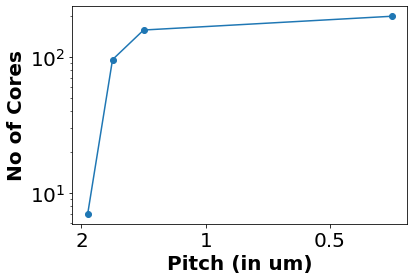

In [27]:
import matplotlib.pyplot as plt
exec_time_list = []
fig, ax = plt.subplots()
core_list = []
for pitch in pitch_list:
    cores =  400/(2+276480*2/(1000000*pitch**2)) 
    exec_time = 200/cores
    exec_time_list.append(exec_time)
    core_list.append(cores)
    
ax.plot(pitch_list, core_list, 'o-')
ax.set_xlabel("Pitch (in um)", fontsize=20, fontweight="bold")
ax.set_ylabel("No of Cores", fontsize=20, fontweight="bold")
plt.rc("xtick", labelsize=20)  # fontsize of the tick labels
plt.rc("ytick", labelsize=20)
ax.set_xticklabels(['3','2','1','0.5','0.1'])
ax.set_yscale('log')

fig.savefig('sweep.png')